# 1. Data Understanding 

In [1]:
#--นำเข้าข้อมูลดิบ (Raw Data) ---
import pandas as pd
nhso_chad = 'chad_2024_01.csv'
fsaudit_data ='fsaudit_data_2024_01_mask.csv'

df1 = pd.read_csv(nhso_chad)
df2 = pd.read_csv(fsaudit_data)

print("1. ข้อมูลดิบ (Raw Data)แสดง 5 แถวแรก ของ chad_2024_01")
print(df1.head())
df1.info()
print("1. ข้อมูลดิบ (Raw Data)แสดง 5 แถวแรก ของ fsaudit_data")
print(df2.head())
df2.info()


C:\Users\Admin\AppData\Local\Temp\ipykernel_19140\3111384883.py:6: DtypeWarning: Columns (1,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(nhso_chad)


1. ข้อมูลดิบ (Raw Data)แสดง 5 แถวแรก ของ chad_2024_01
   chad_id        seq    servdate localcode  \
0   317054  480725524  2024-01-07    744321   
1   317047  480725995  2024-01-07     31001   
2   317035  480726002  2024-01-07    644007   
3   317041  480726002  2024-01-07     55021   
4   343922  480952242  2024-01-08     32201   

                                            descript   qty  unitprice  \
0  glucose anhydrous + potassium chloride + sodiu...   5.0        1.5   
1  Urinalysis (Physical + Chemical + Microscopic)...   1.0       65.0   
2                              hyoscine butylbromide  10.0        1.5   
3                  ค่าบริการผู้ป่วยนอก นอกเวลาราชการ   1.0      100.0   
4                          BUN (Blood Urea Nitrogen)   1.0       50.0   

   chargeamt  billgrcs codesys stdcode    unit  reimbprice  
0        7.5         3       1  744321  sachet         1.5  
1       65.0         7       2   31001    Test        65.0  
2       15.0         3       1  644007   

In [2]:
import pandas as pd

# --- ส่วนที่ 1: เตรียมข้อมูล (Data Preparation) ---

# สมมติว่าโหลดข้อมูลมาแล้ว (df1, df2)
# target_col = ชื่อคอลัมน์ที่ต้องการแก้
target_col = 'codesys'

# ตรวจสอบและแก้ไขใน df1 (ตารางรายการค่ารักษา)
if target_col in df1.columns:
    print(f"🛠️ กำลังแก้ไข Format คอลัมน์ '{target_col}' ใน df1...")
    
    # 1. .astype(str): แปลงข้อมูลเป็นตัวหนังสือให้หมด
    # 2. .str.replace: ลบ .0 ทิ้ง (กรณี Python อ่านเลข 5 เป็น 5.0)
    # 3. .str.zfill(3): เติมเลข 0 ข้างหน้าให้ครบ 3 หลัก (Zero Fill) 
    #    เช่น '5' -> '005', '12' -> '012', '005' -> '005'
    df1[target_col] = df1[target_col].astype(str).str.replace(r'\.0$', '', regex=True).str.zfill(3)
    
    print(f"✅ ตัวอย่างข้อมูลหลังแก้: {df1[target_col].unique()[:10]}") # ดู 10 ตัวแรกเพื่อเช็ค

# (เผื่อใน df2 มีคอลัมน์นี้ด้วย ก็ทำเหมือนกัน)
if target_col in df2.columns:
    df2[target_col] = df2[target_col].astype(str).str.replace(r'\.0$', '', regex=True).str.zfill(3)


# --- ส่วนที่ 2: การรวมข้อมูล (Merge) ตามโค้ดของคุณ ---

# ใช้ pd.merge() เพื่อรวม df1 และ df2 โดยใช้คอลัมน์ 'seq'
df_merged_inner = pd.merge(
    df1, 
    df2, 
    on='seq', 
    how='inner',
    # การตั้งค่า suffixes ช่วยให้เราทราบว่าคอลัมน์ที่ชื่อซ้ำกันมาจากตารางใด
    suffixes=('_chad', '_audit') 
)

print("\n--- 2.1 ผลลัพธ์: Inner Merge (รวมเฉพาะรายการที่ 'seq' ตรงกัน) ---")
print(f"จำนวนแถวก่อน Merge (df1): {len(df1)}")
print(f"จำนวนแถวก่อน Merge (df2): {len(df2)}")
print(f"จำนวนแถวหลัง Inner Merge: {len(df_merged_inner)}")
print(df_merged_inner.head())

# (Optional) ลองเช็คดูว่าหลังจาก Merge แล้ว codesys ยังเป็น 00x อยู่ไหม
if target_col in df_merged_inner.columns:
    print(f"\nเช็ค codesys ในตารางรวม: {df_merged_inner[target_col].unique()[:5]}")

🛠️ กำลังแก้ไข Format คอลัมน์ 'codesys' ใน df1...
✅ ตัวอย่างข้อมูลหลังแก้: ['001' '002' '005' '006' 'NHSO']

--- 2.1 ผลลัพธ์: Inner Merge (รวมเฉพาะรายการที่ 'seq' ตรงกัน) ---
จำนวนแถวก่อน Merge (df1): 1067316
จำนวนแถวก่อน Merge (df2): 274163
จำนวนแถวหลัง Inner Merge: 936244
   chad_id        seq    servdate localcode  \
0  1423900  487729556  2024-01-30   1000542   
1  1423901  487729556  2024-01-30   1001006   
2  1423906  487729556  2024-01-30     55999   
3  1423912  487729558  2024-01-30     55020   
4  1423917  487729561  2024-01-30   1590104   

                                            descript    qty  unitprice  \
0                                           TRAMADOL   30.0        1.0   
1                                         amlodipine   50.0        1.0   
2  อื่นๆ ที่นอกเหนือจากรายการตามหัวข้อ 12.1-12.7 ...    1.0    10000.0   
3                   ค่าบริการผู้ป่วยนอก ในเวลาราชการ    1.0      100.0   
4                                       prednisolone  140.0        1.0   

In [3]:
import os
import pandas as pd

# ชื่อไฟล์ปลายทาง
output_file_parquet = 'merged_audit_data_output.parquet'

print("--- เริ่มกระบวนการซ่อมแซมและบันทึกไฟล์ ---")

# 1. ลบไฟล์เดิมทิ้งก่อน (เพื่อไม่ให้ข้อมูลตีกับไฟล์ที่เสีย)
if os.path.exists(output_file_parquet):
    os.remove(output_file_parquet)
    print(f"1. 🗑️ ลบไฟล์เดิม '{output_file_parquet}' ที่เสียหายทิ้งแล้ว")
else:
    print(f"1. ไม่พบไฟล์เดิม (พร้อมสำหรับการบันทึกใหม่)")

# 2. แปลงข้อมูลให้สะอาด (Data Cleaning)
# แปลงทุกคอลัมน์ที่เป็น Object ให้เป็น String ทั้งหมด เพื่อป้องกัน Error เรื่องชนิดข้อมูล
print("2. 🔄 กำลังแปลงชนิดข้อมูล (Object -> String)...")
for col in df_merged_inner.columns:
    if df_merged_inner[col].dtype == 'object':
        # ใช้ .astype(str) จะเปลี่ยนทั้งตัวเลขและ NaN เป็น String ทั้งหมด
        df_merged_inner[col] = df_merged_inner[col].astype(str)

# 3. บันทึกไฟล์ใหม่ (Save)
try:
    print("3. 💾 กำลังบันทึกไฟล์ Parquet...")
    # ระบุ engine='pyarrow' ให้ชัดเจน
    df_merged_inner.to_parquet(output_file_parquet, engine='pyarrow', index=False)
    print(f"   ✅ บันทึกเสร็จสมบูรณ์!")

    # 4. ทดสอบอ่านไฟล์กลับทันที (Verify)
    print("4. 🧐 ตรวจสอบการอ่านไฟล์กลับ...")
    df_check = pd.read_parquet(output_file_parquet, engine='pyarrow')
    
    print(f"\n🎉 สำเร็จ! อ่านไฟล์ได้เรียบร้อย")
    print(f"   - จำนวนแถว: {len(df_check):,}")
    print(f"   - จำนวนคอลัมน์: {len(df_check.columns)}")

except Exception as e:
    print(f"\n❌ ยังเกิดข้อผิดพลาด: {e}")

--- เริ่มกระบวนการซ่อมแซมและบันทึกไฟล์ ---
1. 🗑️ ลบไฟล์เดิม 'merged_audit_data_output.parquet' ที่เสียหายทิ้งแล้ว
2. 🔄 กำลังแปลงชนิดข้อมูล (Object -> String)...
3. 💾 กำลังบันทึกไฟล์ Parquet...
   ✅ บันทึกเสร็จสมบูรณ์!
4. 🧐 ตรวจสอบการอ่านไฟล์กลับ...

🎉 สำเร็จ! อ่านไฟล์ได้เรียบร้อย
   - จำนวนแถว: 936,244
   - จำนวนคอลัมน์: 28


In [4]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

# --- 1. ตั้งค่า DataFrame ---
target_df = df_check 

# --- 2. ฟังก์ชันสำหรับ VS Code (VS Code Friendly) ---
def show_vscode_scroll(df, rows_per_page=50):
    current_page = 0
    total_rows = len(df)
    total_pages = (total_rows // rows_per_page) + (1 if total_rows % rows_per_page > 0 else 0)
    
    # สร้างกรอบหน้าต่าง
    # height='600px': ความสูง
    # width='100%': ความกว้างให้เต็มพื้นที่ที่ VS Code มีให้
    out = widgets.Output(layout=widgets.Layout(
        height='600px',       
        width='100%',         
        overflow='scroll',     # บังคับให้มี Scrollbar เสมอ (ทั้งแกน X และ Y)
        border='1px solid #ddd' # ใส่ขอบให้เห็นชัดๆ ว่าพื้นที่ตารางอยู่ตรงไหน
    ))
    
    # ปุ่มควบคุม
    btn_prev = widgets.Button(description="< ย้อน", icon='arrow-left', layout=widgets.Layout(width='80px'))
    btn_next = widgets.Button(description="ถัด >", icon='arrow-right', layout=widgets.Layout(width='80px'))
    lbl_page = widgets.Label(value=f"หน้า {current_page + 1} / {total_pages}")

    def render_table(page):
        with out:
            out.clear_output(wait=True)
            start_idx = page * rows_per_page
            end_idx = min((page + 1) * rows_per_page, total_rows)
            
            print(f"📊 แสดงแถวที่ {start_idx} - {end_idx}")
            
            with pd.option_context('display.max_columns', None):
                try:
                    # --- จุดแก้สำหรับ VS Code ---
                    styler = df.iloc[start_idx:end_idx].style\
                        .set_properties(**{
                            'text-align': 'left', 
                            'white-space': 'nowrap', # ห้ามตัดคำ
                            'font-size': '14px'      # ปรับตัวหนังสือให้อ่านง่ายใน VS Code
                        })\
                        .set_table_styles([
                            # 1. บังคับตารางกว้าง 2500px (เพื่อให้เกินหน้าจอ VS Code แน่นอน)
                            {'selector': 'table', 'props': [('min-width', '250px')]},
                            # 2. ตรึงหัวตารางด้านบน
                            {'selector': 'thead th', 'props': [('position', 'sticky'), ('top', '0'), ('background-color', '#f1f1f1'), ('z-index', '1')]},
                            # 3. ตรึงแถวแรกซ้ายสุด (Index)
                            {'selector': 'tbody th', 'props': [('position', 'sticky'), ('left', '0'), ('background-color', '#f1f1f1'), ('z-index', '1')]}
                        ])
                    
                    display(styler)
                except:
                    display(df.iloc[start_idx:end_idx])

    # ฟังก์ชันปุ่มกด
    def on_prev_click(b):
        nonlocal current_page
        if current_page > 0:
            current_page -= 1
            update_display()

    def on_next_click(b):
        nonlocal current_page
        if current_page < total_pages - 1:
            current_page += 1
            update_display()
            
    def update_display():
        start_idx = current_page * rows_per_page
        end_idx = min((current_page + 1) * rows_per_page, total_rows)
        lbl_page.value = f"หน้า {current_page + 1} / {total_pages}"
        render_table(current_page)

    btn_prev.on_click(on_prev_click)
    btn_next.on_click(on_next_click)
    
    display(widgets.HBox([btn_prev, lbl_page, btn_next]))
    display(out)
    render_table(current_page)

# --- 3. เรียกใช้งาน ---
show_vscode_scroll(target_df, rows_per_page=50)

Output(layout=Layout(border_bottom='1px solid #ddd', border_left='1px solid #ddd', border_right='1px solid #dd…

C:\Users\Admin\AppData\Local\Temp\ipykernel_19140\1919782525.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(data=top_20_hcode, x='hcode', y='patient_count', palette='viridis')


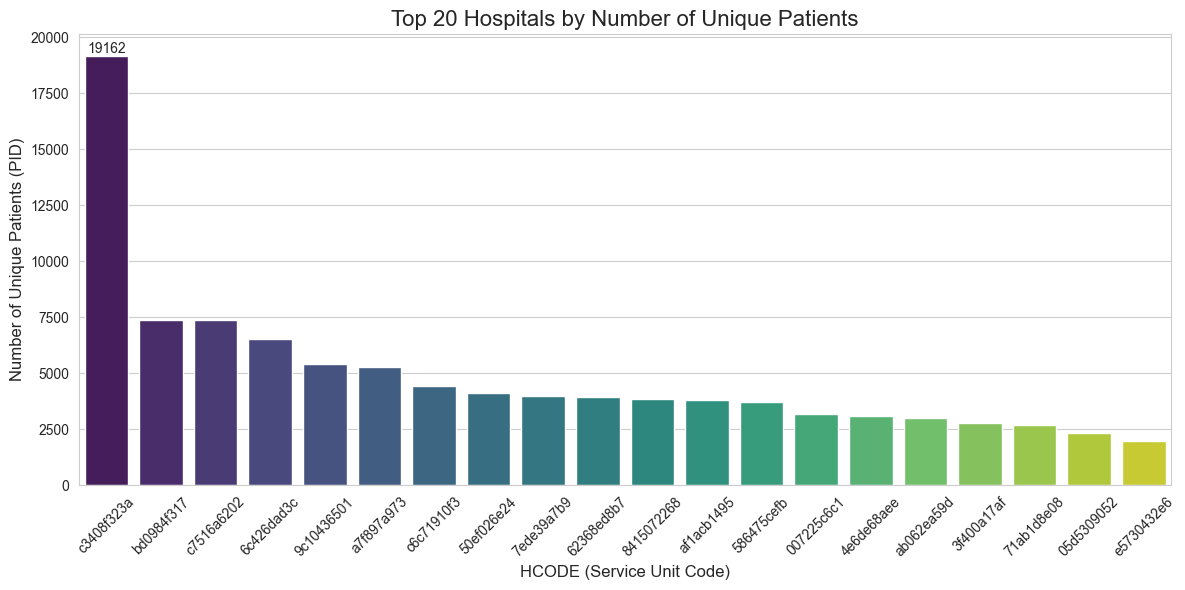

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. เตรียมข้อมูล: นับจำนวนคนไข้ที่ไม่ซ้ำ (Unique PID) ต่อหน่วยบริการ (hcode)
# ใช้ df_check หรือชื่อตัวแปร DataFrame ล่าสุดของคุณ
plot_data = df_merged_inner.groupby('hcode')['pid'].nunique().reset_index()
plot_data.columns = ['hcode', 'patient_count'] # ตั้งชื่อคอลัมน์ใหม่

# 2. เรียงลำดับจากมากไปน้อย และเลือกมาแค่ 20 อันดับแรก (เพื่อให้กราฟดูง่าย)
top_20_hcode = plot_data.sort_values('patient_count', ascending=False).head(20)

# 3. สร้างกราฟแท่ง (Bar Chart)
plt.figure(figsize=(12, 6)) # กำหนดขนาดกราฟ
sns.set_style("whitegrid")

# พล็อต
chart = sns.barplot(data=top_20_hcode, x='hcode', y='patient_count', palette='viridis')

# 4. ตกแต่งกราฟ
plt.title('Top 20 Hospitals by Number of Unique Patients', fontsize=16)
plt.xlabel('HCODE (Service Unit Code)', fontsize=12)
plt.ylabel('Number of Unique Patients (PID)', fontsize=12)
plt.xticks(rotation=45) # เอียงตัวหนังสือแกน X ให้อ่านง่าย
plt.bar_label(chart.containers[0], fmt='%.0f') # ใส่ตัวเลขบนแท่งกราฟ

plt.tight_layout()
plt.show()

In [6]:
import pandas as pd

# --- 1. กรองข้อมูลจาก df_merged_inner (ตามโจทย์) ---
target_hcode = 'c3408f323a'

# ตรวจสอบว่ามีคอลัมน์ hcode หรือ localcode
hcode_col = 'hcode'

# แปลงเป็น String เพื่อป้องกันความผิดพลาดเวลาเทียบรหัส
df_merged_inner[hcode_col] = df_merged_inner[hcode_col].astype(str)
df_hospital = df_merged_inner[df_merged_inner[hcode_col] == target_hcode].copy()

print(f"🏥 โรงพยาบาล: {target_hcode}")
print(f"📌 แหล่งข้อมูล: df_merged_inner")
print(f"จำนวนรายการที่พบ: {len(df_hospital):,} รายการ")

if len(df_hospital) > 0:
    # ==========================================
    # ส่วนที่ 1: วิเคราะห์ยอดเงิน (Charge Amount)
    # ==========================================
    
    # Cleansing: แปลงยอดเงินเป็นตัวเลข
    cost_col = 'chargeamt_chad' if 'chargeamt_chad' in df_hospital.columns else 'chargeamt'
    # ลบลูกน้ำและแปลงเป็นตัวเลข
    cost_data = pd.to_numeric(df_hospital[cost_col].astype(str).str.replace(',', ''), errors='coerce').dropna()
    
    print(f"\n--- 💰 1. สถิติของยอดเงิน ({cost_col}) ---")
    print(f"   Mean (เฉลี่ย):      {cost_data.mean():,.2f} บาท")
    print(f"   Median (มัธยฐาน):   {cost_data.median():,.2f} บาท")
    print(f"   Variance (ความแปรปรวน): {cost_data.var():,.2f}")
    print(f"   Std Dev (เบี่ยงเบน):  {cost_data.std():,.2f}")
    print(f"   Min - Max:        {cost_data.min():,.2f} - {cost_data.max():,.2f} บาท")

    # ==========================================
    # ส่วนที่ 2: วิเคราะห์จำนวนคน PID (Frequency per Patient)
    # ==========================================
    # โจทย์: สถิติของ "จำนวนคน pid" 
    # การตีความ: คือดูว่า "คนไข้ 1 คน (Unique PID) มีรายการรับบริการกี่รายการ (Frequency)"
    
    # นับจำนวนรายการต่อ 1 PID
    pid_counts = df_hospital['pid'].value_counts()
    
    print(f"\n--- 👥 2. สถิติการใช้บริการต่อคน (Items per PID) ---")
    print(f"   Mean (เฉลี่ย):      {pid_counts.mean():,.2f} รายการ/คน")
    print(f"   Median (มัธยฐาน):   {pid_counts.median():,.2f} รายการ/คน")
    print(f"   Variance (ความแปรปรวน): {pid_counts.var():,.2f}")
    print(f"   Std Dev (เบี่ยงเบน):  {pid_counts.std():,.2f}")
    print(f"   Min - Max:        {pid_counts.min():,.0f} - {pid_counts.max():,.0f} รายการ")
    
    print(f"\n   *คำอธิบาย: คนไข้ 1 คน มีรายการเฉลี่ย {pid_counts.mean():.2f} รายการ")
    print(f"             และคนที่มีรายการเยอะที่สุดคือ {pid_counts.max()} รายการ")

else:
    print("\n❌ ไม่พบข้อมูลของโรงพยาบาลนี้ใน df_merged_inner")
    print("ข้อสังเกต: หากโรงพยาบาลนี้มีคนไข้แต่ไม่มีข้อมูล Audit การใช้ inner join จะทำให้ข้อมูลเป็น 0 ครับ")

🏥 โรงพยาบาล: c3408f323a
📌 แหล่งข้อมูล: df_merged_inner
จำนวนรายการที่พบ: 124,230 รายการ

--- 💰 1. สถิติของยอดเงิน (chargeamt) ---
   Mean (เฉลี่ย):      543.05 บาท
   Median (มัธยฐาน):   100.00 บาท
   Variance (ความแปรปรวน): 23,953,473.93
   Std Dev (เบี่ยงเบน):  4,894.23
   Min - Max:        0.00 - 200,000.00 บาท

--- 👥 2. สถิติการใช้บริการต่อคน (Items per PID) ---
   Mean (เฉลี่ย):      6.48 รายการ/คน
   Median (มัธยฐาน):   5.00 รายการ/คน
   Variance (ความแปรปรวน): 34.76
   Std Dev (เบี่ยงเบน):  5.90
   Min - Max:        1 - 145 รายการ

   *คำอธิบาย: คนไข้ 1 คน มีรายการเฉลี่ย 6.48 รายการ
             และคนที่มีรายการเยอะที่สุดคือ 145 รายการ


📊 กำลังสร้างกราฟ Timeline ของผู้ป่วย 20 คนที่มาใช้บริการบ่อยที่สุด...
จำนวนจุดข้อมูลที่จะพล็อต: 1364 จุด


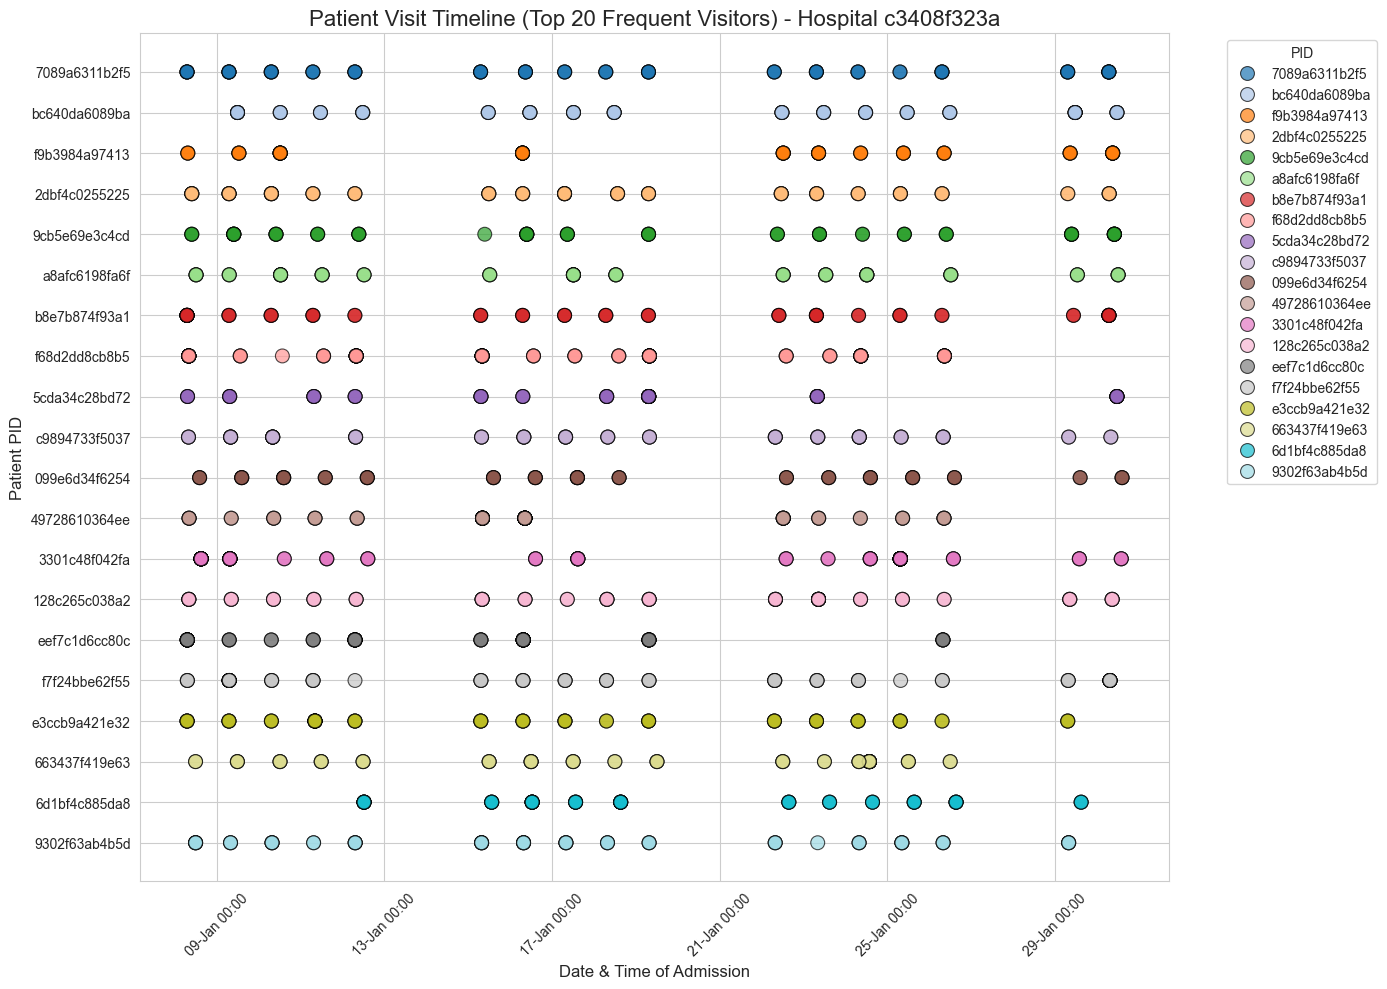

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# --- 1. เตรียมข้อมูล ---
# ใช้ข้อมูลจาก df_merged_inner (หรือ df_hospital_full ถ้าอยากเห็นข้อมูลดิบ)
target_hcode = 'c3408f323a' # รหัสโรงพยาบาลเป้าหมาย

# กรองเฉพาะโรงพยาบาลนี้
if 'df_merged_inner' in locals():
    df_plot = df_merged_inner[df_merged_inner['hcode'] == target_hcode].copy()
else:
    # กรณีตัวแปรหาย ให้โหลดไฟล์ CSV ล่าสุด
    try:
        df_plot = pd.read_csv(f'Full_Detail_{target_hcode}.csv')
    except:
        print("❌ ไม่พบข้อมูล กรุณารันโค้ดโหลดข้อมูลก่อนหน้านี้ครับ")
        df_plot = pd.DataFrame()

if not df_plot.empty:
    # --- 2. จัดการเรื่องเวลา (สำคัญมาก!) ---
    # แปลง dateadm เป็น datetime object
    df_plot['dateadm'] = pd.to_datetime(df_plot['dateadm'], errors='coerce')
    # ตัดแถวที่ไม่มีวันที่ออก
    df_plot = df_plot.dropna(subset=['dateadm'])

    # --- 3. คัดเลือกเฉพาะ "Top 20 PID" ที่มาบ่อยที่สุด ---
    # (ถ้าพล็อตทุกคน กราฟจะเละครับ ต้องเลือกตัวตึงมาดู)
    top_pids = df_plot['pid'].value_counts().head(20).index
    
    # กรองเอาเฉพาะข้อมูลของ 20 คนนี้
    df_subset = df_plot[df_plot['pid'].isin(top_pids)].copy()
    
    # แปลง PID เป็น String เพื่อให้กราฟมองเป็น "กลุ่มสี" ไม่ใช่ "ตัวเลข"
    df_subset['pid'] = df_subset['pid'].astype(str)

    print(f"📊 กำลังสร้างกราฟ Timeline ของผู้ป่วย 20 คนที่มาใช้บริการบ่อยที่สุด...")
    print(f"จำนวนจุดข้อมูลที่จะพล็อต: {len(df_subset)} จุด")

    # --- 4. สร้างกราฟ Scatter Plot (Timeline) ---
    plt.figure(figsize=(14, 10)) # ปรับขนาดกราฟให้ใหญ่หน่อย
    sns.set_style("whitegrid")

    # สร้างกราฟ
    # x = เวลา
    # y = PID (รายชื่อคนไข้)
    # hue = PID (แยกสีตามคนไข้)
    chart = sns.scatterplot(
        data=df_subset, 
        x='dateadm', 
        y='pid', 
        hue='pid',          # บังคับให้ pid เดียวกันสีเดียวกัน
        palette='tab20',    # ชุดสีที่มีความหลากหลาย (20 สี)
        s=100,              # ขนาดจุด (Size)
        alpha=0.7,          # ความโปร่งแสง (เผื่อจุดซ้อนกัน)
        edgecolor='black'   # ขอบจุดสีดำให้เห็นชัด
    )

    # --- 5. ตกแต่งกราฟ ---
    plt.title(f'Patient Visit Timeline (Top 20 Frequent Visitors) - Hospital {target_hcode}', fontsize=16)
    plt.xlabel('Date & Time of Admission', fontsize=12)
    plt.ylabel('Patient PID', fontsize=12)

    # จัด Format แกนเวลา (X-axis)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b %H:%M')) # แสดง วัน-เดือน เวลา
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.xticks(rotation=45) # เอียงตัวหนังสือ

    # ย้ายกล่องสี (Legend) ออกไปข้างนอกจะได้ไม่บังกราฟ
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='PID')

    plt.tight_layout()
    plt.show()

else:
    print("ไม่มีข้อมูลสำหรับพล็อตกราฟ")

In [8]:
import pandas as pd
from IPython.display import display

# --- 1. เตรียมข้อมูล (ดึงเฉพาะ Top 20 คนจากขั้นตอนก่อนหน้า) ---
# ตรวจสอบว่ามีตัวแปร df_subset จากกราฟเมื่อกี้ไหม ถ้าไม่มีให้สร้างใหม่
if 'df_subset' not in locals() or df_subset.empty:
    # (เผื่อโค้ดก่อนหน้าไม่ได้รัน) สร้างใหม่แบบรวบรัด
    target_hcode = 'c3408f323a'
    if 'df_merged_inner' in locals():
        df_temp = df_merged_inner[df_merged_inner['hcode'] == target_hcode].copy()
        top_pids = df_temp['pid'].value_counts().head(20).index
        df_subset = df_temp[df_temp['pid'].isin(top_pids)].copy()

# --- 2. ตารางที่ 1: สรุปภาพรวมรายคน (Ranking) ---
print(f"\n🏆 ตารางสรุป: 20 อันดับผู้ป่วยที่มาใช้บริการถี่ที่สุด (Hospital {target_hcode})")

# จัดกลุ่มตาม PID เพื่อหา ยอดรวมเงิน และ จำนวนครั้ง
summary_table = df_subset.groupby('pid').agg({
    'seq': 'count',                     # นับจำนวนครั้ง (Visit Count)
    'chargeamt': ['sum', 'mean'],       # ยอดเงินรวม และ เฉลี่ย
    'dateadm': ['min', 'max']           # วันแรกที่มา - วันล่าสุด
}).reset_index()

# ตั้งชื่อคอลัมน์ใหม่ให้อ่านง่าย
summary_table.columns = ['PID', 'Total_Visits', 'Total_Charge (Baht)', 'Avg_Charge (Baht)', 'First_Visit', 'Last_Visit']

# เรียงลำดับตามจำนวนครั้ง (มาก -> น้อย)
summary_table = summary_table.sort_values('Total_Visits', ascending=False).reset_index(drop=True)

# แสดงผลแบบใส่สี (Heatmap) เพื่อให้เห็นตัวเลขสูงๆ ชัดเจน
display(summary_table.style.background_gradient(subset=['Total_Visits', 'Total_Charge (Baht)'], cmap='Reds'))


# --- 3. ตารางที่ 2: รายละเอียดรายครั้ง (Transaction Logs) ---
print(f"\n📋 ตารางรายละเอียด: ประวัติการรักษาทั้งหมดของ 20 คนนี้ ({len(df_subset)} รายการ)")

# เลือกคอลัมน์ที่น่าสนใจ
cols_to_show = ['pid', 'dateadm', 'seq', 'chad_id', 'pdx','billgrcs','codesys','descript', 'chargeamt', 'fsaudit_status']
# เช็คว่าคอลัมน์มีจริงไหม (กัน Error)
valid_cols = [c for c in cols_to_show if c in df_subset.columns]

# จัดเรียงตาม PID และ วันที่
detailed_view = df_subset[valid_cols].sort_values(by=['pid', 'dateadm'])

# ใช้ฟังก์ชันตารางเลื่อนได้ (ที่เราสร้างไว้ก่อนหน้านี้) เพื่อดูข้อมูลยาวๆ
try:
    # เรียกใช้ฟังก์ชัน show_vscode_scroll ถ้ามี
    show_vscode_scroll(detailed_view, rows_per_page=50)
except NameError:
    # ถ้าฟังก์ชันหาย ให้แสดงแบบธรรมดาแต่เลื่อนได้
    with pd.option_context('display.max_rows', 200):
        display(detailed_view)


🏆 ตารางสรุป: 20 อันดับผู้ป่วยที่มาใช้บริการถี่ที่สุด (Hospital c3408f323a)


,PID,Total_Visits,Total_Charge (Baht),Avg_Charge (Baht),First_Visit,Last_Visit
0,3301c48f042fa,145,90130.000000,621.586207,2024-01-08 15:10:00,2024-01-30 13:48:00
1,f68d2dd8cb8b5,95,114589.500000,1206.205263,2024-01-08 08:07:00,2024-01-26 08:35:00
2,49728610364ee,74,33649.000000,454.716216,2024-01-08 08:17:00,2024-01-26 08:21:00
3,eef7c1d6cc80c,71,90527.500000,1275.035211,2024-01-08 07:16:00,2024-01-26 07:44:00
4,2dbf4c0255225,68,119424.750000,1756.246324,2024-01-08 09:50:00,2024-01-30 06:53:00
5,128c265c038a2,67,110524.000000,1649.611940,2024-01-08 08:09:00,2024-01-30 08:35:00
6,9cb5e69e3c4cd,67,102187.000000,1525.179104,2024-01-08 09:49:00,2024-01-30 09:50:00
7,7089a6311b2f5,65,107458.000000,1653.200000,2024-01-08 07:07:00,2024-01-30 06:41:00
8,e3ccb9a421e32,65,108752.000000,1673.107692,2024-01-08 07:09:00,2024-01-29 07:10:00
9,b8e7b874f93a1,63,50040.000000,794.285714,2024-01-08 07:07:00,2024-01-30 06:44:00



📋 ตารางรายละเอียด: ประวัติการรักษาทั้งหมดของ 20 คนนี้ (1364 รายการ)


Output(layout=Layout(border_bottom='1px solid #ddd', border_left='1px solid #ddd', border_right='1px solid #dd…